In [104]:
import requests


def get_data(stock_symbol):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={stock_symbol}&interval=5min&apikey=key'

    r = requests.get(url)

    if r.status_code == 200:
        data = r.json()
        return data
    else:

        return None


stock_symbol = 'DIS'

data = get_data(stock_symbol)

if data:
    print(data)
else:
    print(f"Failed to retrieve data for {stock_symbol}. Check your API key or the symbol.")



{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'DIS', '3. Last Refreshed': '2023-10-30 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2023-10-30 19:55:00': {'1. open': '80.5400', '2. high': '80.6700', '3. low': '80.5300', '4. close': '80.6700', '5. volume': '670'}, '2023-10-30 19:50:00': {'1. open': '80.6000', '2. high': '80.6700', '3. low': '80.5900', '4. close': '80.6700', '5. volume': '32'}, '2023-10-30 19:45:00': {'1. open': '80.5400', '2. high': '80.6700', '3. low': '80.5300', '4. close': '80.6000', '5. volume': '61'}, '2023-10-30 19:40:00': {'1. open': '80.5400', '2. high': '80.6700', '3. low': '80.5300', '4. close': '80.6700', '5. volume': '278'}, '2023-10-30 19:35:00': {'1. open': '80.6000', '2. high': '80.6000', '3. low': '80.5300', '4. close': '80.5650', '5. volume': '252'}, '2023-10-30 19:30:00': {'1. open': '80.5400', '2. high': '80.5800', '3. lo

In [105]:
import pandas as pd

df = pd.DataFrame(data['Time Series (5min)']).T

df.index = pd.to_datetime(df.index)

df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [106]:
df

,Open,High,Low,Close,Volume
2023-10-30 19:55:00,80.5400,80.6700,80.5300,80.6700,670
2023-10-30 19:50:00,80.6000,80.6700,80.5900,80.6700,32
2023-10-30 19:45:00,80.5400,80.6700,80.5300,80.6000,61
2023-10-30 19:40:00,80.5400,80.6700,80.5300,80.6700,278
2023-10-30 19:35:00,80.6000,80.6000,80.5300,80.5650,252
...,...,...,...,...,...
2023-10-30 12:00:00,79.8800,79.9000,79.8100,79.8400,69998
2023-10-30 11:55:00,79.8700,79.9400,79.8500,79.8900,54624
2023-10-30 11:50:00,79.7350,79.8700,79.7200,79.8700,64271
2023-10-30 11:45:00,79.7900,79.8050,79.6780,79.7350,63011


In [107]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [108]:
from sklearn.svm import SVC

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
import numpy as np

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
X = df[['Open', 'High', 'Low', 'Volume']]
X

,Open,High,Low,Volume
2023-10-30 19:55:00,80.5400,80.6700,80.5300,670
2023-10-30 19:50:00,80.6000,80.6700,80.5900,32
2023-10-30 19:45:00,80.5400,80.6700,80.5300,61
2023-10-30 19:40:00,80.5400,80.6700,80.5300,278
2023-10-30 19:35:00,80.6000,80.6000,80.5300,252
...,...,...,...,...
2023-10-30 12:00:00,79.8800,79.9000,79.8100,69998
2023-10-30 11:55:00,79.8700,79.9400,79.8500,54624
2023-10-30 11:50:00,79.7350,79.8700,79.7200,64271
2023-10-30 11:45:00,79.7900,79.8050,79.6780,63011


In [114]:
y = df['Close']
y

2023-10-30 19:55:00    80.6700
2023-10-30 19:50:00    80.6700
2023-10-30 19:45:00    80.6000
2023-10-30 19:40:00    80.6700
2023-10-30 19:35:00    80.5650
                        ...   
2023-10-30 12:00:00    79.8400
2023-10-30 11:55:00    79.8900
2023-10-30 11:50:00    79.8700
2023-10-30 11:45:00    79.7350
2023-10-30 11:40:00    79.7850
Name: Close, Length: 100, dtype: object

In [115]:
def score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    print(model.score(X_test,y_test))

le = LinearRegression()
lgr = LogisticRegression()
scv = SVC()
frst = RandomForestClassifier(n_estimators=50)

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
score(le, X_train, X_test, y_train, y_test)
score(lgr, X_train, X_test, y_train, y_test)
score(scv, X_train, X_test, y_train, y_test)
score(frst, X_train, X_test, y_train, y_test)

0.9784819507089392
0.03333333333333333
0.16666666666666666
0.03333333333333333


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
X_test

,Open,High,Low,Volume
2023-10-30 19:35:00,80.6000,80.6000,80.5300,252
2023-10-30 14:00:00,80.5150,80.5500,80.4700,58538
2023-10-30 11:45:00,79.7900,79.8050,79.6780,63011
2023-10-30 12:25:00,79.8000,79.8050,79.7550,47240
2023-10-30 16:35:00,80.6300,80.6300,80.6200,181
2023-10-30 15:50:00,80.8200,80.8600,80.7300,269646
2023-10-30 17:15:00,80.5100,80.6300,80.5000,582
2023-10-30 15:20:00,80.8100,80.8600,80.7950,76963
2023-10-30 19:05:00,80.6700,80.6700,80.5400,13
2023-10-30 19:55:00,80.5400,80.6700,80.5300,670


In [119]:
y_pred = le.predict(X)

In [120]:
df['pred'] = pd.DataFrame(data={'pred': y_pred}, index=df.index)
df

,Open,High,Low,Close,Volume,pred
2023-10-30 19:55:00,80.5400,80.6700,80.5300,80.6700,670,80.631538
2023-10-30 19:50:00,80.6000,80.6700,80.5900,80.6700,32,80.648619
2023-10-30 19:45:00,80.5400,80.6700,80.5300,80.6000,61,80.631488
2023-10-30 19:40:00,80.5400,80.6700,80.5300,80.6700,278,80.631506
2023-10-30 19:35:00,80.6000,80.6000,80.5300,80.5650,252,80.539679
...,...,...,...,...,...,...
2023-10-30 12:00:00,79.8800,79.9000,79.8100,79.8400,69998,79.860717
2023-10-30 11:55:00,79.8700,79.9400,79.8500,79.8900,54624,79.934857
2023-10-30 11:50:00,79.7350,79.8700,79.7200,79.8700,64271,79.854277
2023-10-30 11:45:00,79.7900,79.8050,79.6780,79.7350,63011,79.726694


In [121]:
df['Close'].dtype
df['Close'] = df['Close'].astype(float)
df['Close'].dtype


dtype('float64')

In [122]:
df['pred'].dtype

dtype('float64')

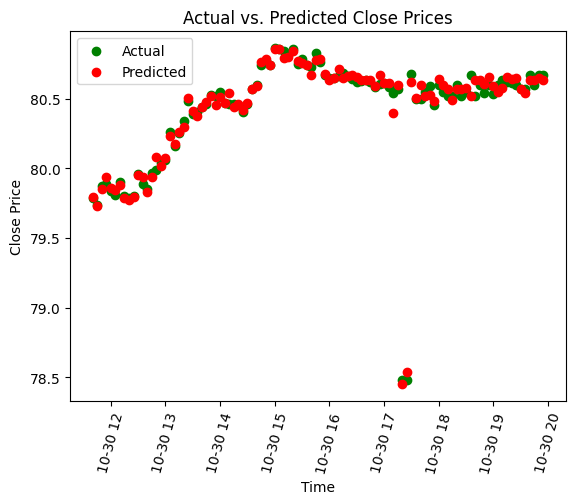

In [124]:

import matplotlib.pyplot as plt

plt.scatter(df.index, df['Close'], color="green", label="Actual")
plt.scatter(df.index, df['pred'], color="red", label="Predicted")

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.xticks(rotation=75)

plt.show()